In [2]:
# conda activate py27_NLP
import sys
sys.path.append('/home/ydc19/Projects/NLP/medtopics')

from utils import corpus

# First, run the mongoDB service on a terminal
# mongod (or sudo mongod)
from pymongo import MongoClient
client = MongoClient()

db_exams = client.chestxrays
collection = db_exams.metadata
collection.estimated_document_count()

2775988

In [67]:
# Get labels in DB
dLabelsInDB = dict()
res = collection.distinct("Annotations.Report.labels")
for i in res:
    if i == None:
        print format(i)
    dLabelsInDB[i] = 0
print dLabelsInDB

None
None
{u'right_upper_lobe_collapse': 0, u'mediastinum_displaced': 0, u'pleural_effusion': 0, u'subcutaneous_emphysema': 0, u'dextrocardia': 0, u'scoliosis': 0, u'right_lower_lobe_collapse': 0, u'parenchymal_lesion': 0, u'interstitial_shadowing': 0, u'rib_lesion': 0, u'unfolded_aorta': 0, u'mediastinum_widened': 0, u'hyperexpanded_lungs': 0, u'right_middle_lobe_collapse': 0, u'emphysema': 0, u'pneumomediastinum': 0, u'atelectasis': 0, u'hemidiaphragm_elevated': 0, u'ground_glass_opacification': 0, u'left_lower_lobe_collapse': 0, u'pleural_abnormality': 0, u'bronchial_wall_thickening': 0, u'pneumothorax': 0, u'normal': 0, u'pneumoperitoneum': 0, u'cardiomegaly': 0, u'object': 0, u'consolidation': 0, u'hernia': 0, None: 0, u'bulla': 0, u'left_upper_lobe_collapse': 0, u'dilated_bowel': 0, u'rib_fracture': 0, u'paratracheal_hilar_enlargement': 0, u'clavicle_fracture': 0, u'cavitating_lung_lesion': 0, u'aortic_calcification': 0}


In [80]:
# Count pressence of each label
for l in dLabelsInDB:
    if l == None:
        dLabelsInDB[l] = collection.count_documents({"Annotations.Report.labels": None,"PatientAge":{"$gt": 5840}})
    else:
        dLabelsInDB[l] = collection.count_documents({"Annotations.Report.labels": {"$exists": "true", "$in": [l]},"PatientAge":{"$gt": 5840}})
        

print dLabelsInDB
print sum(dLabelsInDB.values())

{u'right_upper_lobe_collapse': 15139, u'mediastinum_displaced': 2741, u'pleural_effusion': 214402, u'subcutaneous_emphysema': 13518, u'dextrocardia': 558, u'scoliosis': 14785, u'right_lower_lobe_collapse': 2126, u'parenchymal_lesion': 79472, u'interstitial_shadowing': 43176, u'rib_lesion': 2279, u'unfolded_aorta': 17956, u'mediastinum_widened': 2034, u'hyperexpanded_lungs': 57057, u'right_middle_lobe_collapse': 990, u'emphysema': 20253, u'pneumomediastinum': 964, u'atelectasis': 109627, u'hemidiaphragm_elevated': 15739, u'ground_glass_opacification': 2388, u'left_lower_lobe_collapse': 7122, u'pleural_abnormality': 44184, u'bronchial_wall_thickening': 17252, u'pneumothorax': 43088, u'normal': 584287, u'pneumoperitoneum': 3502, u'cardiomegaly': 208778, u'object': 301184, u'consolidation': 236478, u'hernia': 28134, None: 472744, u'bulla': 2858, u'left_upper_lobe_collapse': 3363, u'dilated_bowel': 866, u'rib_fracture': 28828, u'paratracheal_hilar_enlargement': 22260, u'clavicle_fracture': 

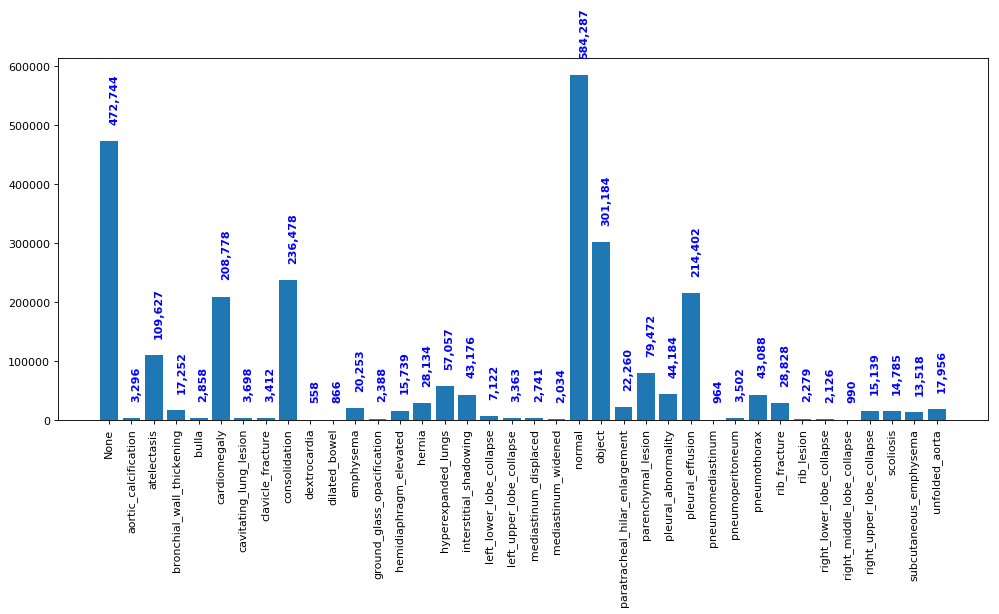

In [132]:
def plotDistLabels(dLabels, tagLabels=None):
    
    import matplotlib.pyplot as plt
    from collections import OrderedDict
    
    if not tagLabels:
        tagLabels = dLabels.keys()
        
    for tl in tagLabels:
        if tl not in dLabels:
            dLabels[tl] = 0
            
    dLabels = OrderedDict(sorted(dLabels.items(), key=lambda t: t[0]))

    fig, ax = plt.subplots(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(range(len(dLabels)), dLabels.values(), align='center')
    plt.xticks(range(len(dLabels)), dLabels.keys(), rotation='vertical')
    for i, v in enumerate(dLabels.values()):
        ax.text(i, v + max(dLabels.values())/20, '{:,}'.format(v), color='blue', fontweight='bold', rotation='vertical', verticalalignment='bottom')
    plt.show()
    
    
plotDistLabels(dLabelsInDB)

In [15]:
collection.find_one()

{u'AccessionNumber': u'A84263b3da4c9e0cc6917782c21097ad8',
 u'AdmittingDiagnosesDescription': u'',
 u'Annotations': {u'Report': {u'Parsed': {u'Sentences': [{u'char_offsets': [[0,
        4],
       [5, 11],
       [12, 18],
       [19, 24],
       [24, 25]],
      u'deps_basic': [[u'root', -1, 2],
       [u'compound', 1, 0],
       [u'nsubj', 2, 1],
       [u'xcomp', 2, 3],
       [u'punct', 2, 4]],
      u'deps_cc': [[u'root', -1, 2],
       [u'compound', 1, 0],
       [u'nsubj', 2, 1],
       [u'xcomp', 2, 3],
       [u'punct', 2, 4]],
      u'pos': [u'NN', u'NNS', u'VBP', u'JJ', u'.'],
      u'tokens': [u'Lung', u'fields', u'appear', u'clear', u'.']}]},
   u'attributes': [],
   u'labels': [u'normal'],
   u'radlex_entity': [{u'RID': u'RID13437',
     u'eid': 0,
     u'indices': [0],
     u'main_class': u'anatomical_entity',
     u's_index': 0},
    {u'RID': u'RID38670',
     u'eid': 1,
     u'indices': [3],
     u'main_class': u'descriptor',
     u's_index': 0},
    {u'RID': u'bodylo

# 1,000 reports:
## Randomly selected (excluding "normal")

### Pipeline:
#### Select 3K rand docs from DB
#### Remove duplicate "reports"
#### Select 1K rand from this set

In [153]:
docs = collection.aggregate([{"$match":{'Annotations.Report.labels': { "$exists" : True , "$nin": ['normal']}, "PatientAge":{"$gt": 5840}}},
                             {"$sample": {"size": 3000}}])

docs = list(docs) # convert cursor to list (static)

In [154]:
# Convert docs into dataframe:
import pandas as pd
dfReports = pd.DataFrame(columns=["_id","Report","labels"])

dLabelsInSet = dict()
for doc in docs:
    dfReports = dfReports.append(pd.Series([doc["_id"], doc["Report"], doc["Annotations"]["Report"]["labels"]], index=dfReports.columns), ignore_index=True)

In [157]:
print len(dfReports)
print len(dfReports.Report.drop_duplicates())

3000
2523


In [162]:
dfReportsUnique = dfReports.drop_duplicates(subset=['Report']).copy()
dfReportsUnique.head()

_id                                             Report  \
0  2326063  There has been an interval sternotomy and AVR....   
1  2248624  Old rib fractures noted. Normal heart size. Bi...   
2  1008192                          AP. No major lung lesion.   
3  1010929  Portable AP semi erect chest film. The patient...   
4   939375  AP erect view. There is pulmonary venous conge...   

                                              labels  
0                            [object, consolidation]  
1                        [atelectasis, rib_fracture]  
2                                                 []  
3                                 [pleural_effusion]  
4  [hemidiaphragm_elevated, cardiomegaly, unfolde...

In [ ]:
# Extract from AnnotateX reports already labeled

In [213]:
import requests


def query(gql):
    request = requests.post('http://apricot:4000/graphql', json={'query': gql})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(request.status_code, query))


gql = """
{
  submissions(offset:0, limit:3){
    id
    report{
      content      
    }
    user{
      id
    }
    annotations{
      labels
    }
  }
}
"""

result = query(gql)
print(result)

{u'data': {u'submissions': [{u'report': {u'content': u'The lungs are clear.  The heart is not enlarged.  No signs of active TB.'}, u'annotations': [{u'labels': [u'normal']}, {u'labels': [u'normal']}, {u'labels': [u'normal']}], u'id': u'1042', u'user': {u'id': 703}}, {u'report': {u'content': u'Comparison is made with the chest radiograph from 17/9/10. The soft tissue mass has increased slightly in size compared to previous.  Groundglass opacification has resolved and there is no evidence of frank consolidation.  No pneumothorax.'}, u'annotations': [{u'labels': [u'parenchymal_lesion']}, {u'labels': [u'normal']}, {u'labels': [u'normal']}, {u'labels': [u'normal']}], u'id': u'1043', u'user': {u'id': 703}}, {u'report': {u'content': u'Comparison is made with previous imaging.   The heart is at the upper limit of normal in size.  There is evidence of airway thickening in the left lower lobe.  There is some loss of clarity of the medial left hemidiaphragm suggesting a degree of left lower lobe 

In [261]:
result['data']['submissions'][0]['user'][]

{u'id': 703}

In [258]:
df = pd.DataFrame(columns=['id', 'report', 'user', 'annotations'])
for r in result['data']['submissions']:
    ll = []
    for a in r['annotations']:
        print a['labels']
        for l in a['labels']:
            print l
            ll.append(l)
        # l = l.append(a['labels'])
    
    print pd.DataFrame([r['id'], r['report']['content'], r['user']], columns=['id', 'report', 'user'])
#df.head()

[u'normal']
normal
[u'normal']
normal
[u'normal']
normal


ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

In [180]:
dfReportsRAND1K = dfReportsUnique.sample(1000).copy()
dfReportsRAND1K.head()

_id                                             Report  \
2326  2457445  AP. Even allowing for projection the heart app...   
2380   852458  Normal sized heart. Lung fields are clear. No ...   
1817  2283213  Comparison made to previous imaging. No signif...   
10     282758  If you require a formal report on this image p...   
2369  1416558  Normal mediastinal contours and pleural spaces...   

                                                 labels  
2326                                     [cardiomegaly]  
2380                                        [emphysema]  
1817  [hemidiaphragm_elevated, atelectasis, consolid...  
10                                                   []  
2369                                                 []

In [159]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [181]:
# Find different sentences:
dSentences = dict()
for i, doc in dfReportsRAND1K.iterrows():
    for s in split_into_sentences(doc['Report'].encode('ascii')):
        dSentences[s] = dSentences[s] + 1 if s in dSentences else 1

In [183]:
for s in dSentences.keys():
    if dSentences[s] > 10:
        print '{}:{}'.format(dSentences[s], s)

13:AP.
18:The lungs are otherwise clear.
19:The lungs and pleural spaces are clear.
14:Lungs clear.
20:The heart is enlarged.
27:The heart is not enlarged.
11:No focal active lung lesion seen.
13:Lung fields are clear.
15:No lung lesion seen.
11:No active lung lesion seen.
14:Heart size is normal.
19:No pleural effusion.
43:No pneumothorax.
17:Heart size normal.
15:AP erect.
27:The heart size is normal.
14:Remaining lungs are clear.
45:Normal heart size.
13:Heart size within normal limits.
26:The lungs are clear.


In [189]:
import pandas as pd
dfReports = pd.DataFrame(columns=["_id","Report","labels"])

dLabelsInSet = dict()
for i, doc in dfReportsRAND1K.iterrows():
    if not doc['labels']:
        dLabelsInSet[None] = dLabelsInSet[None] + 1 if None in dLabelsInSet else 1
    for l in doc['labels']:
        dLabelsInSet[l] = dLabelsInSet[l] + 1 if l in dLabelsInSet else 1
print dLabelsInSet

{u'right_upper_lobe_collapse': 13, u'scoliosis': 15, u'mediastinum_displaced': 2, u'pleural_effusion': 159, u'subcutaneous_emphysema': 12, u'unfolded_aorta': 11, u'right_lower_lobe_collapse': 1, u'parenchymal_lesion': 61, u'interstitial_shadowing': 37, u'rib_lesion': 1, u'aortic_calcification': 4, u'mediastinum_widened': 5, u'hyperexpanded_lungs': 35, u'emphysema': 17, u'pneumomediastinum': 2, u'atelectasis': 94, u'hemidiaphragm_elevated': 13, u'rib_fracture': 26, u'left_lower_lobe_collapse': 6, u'bronchial_wall_thickening': 14, u'pneumothorax': 34, u'pneumoperitoneum': 3, u'cardiomegaly': 154, u'object': 240, u'consolidation': 165, u'hernia': 24, None: 292, u'bulla': 1, u'dilated_bowel': 1, u'ground_glass_opacification': 1, u'paratracheal_hilar_enlargement': 10, u'clavicle_fracture': 3, u'cavitating_lung_lesion': 5, u'pleural_abnormality': 30}


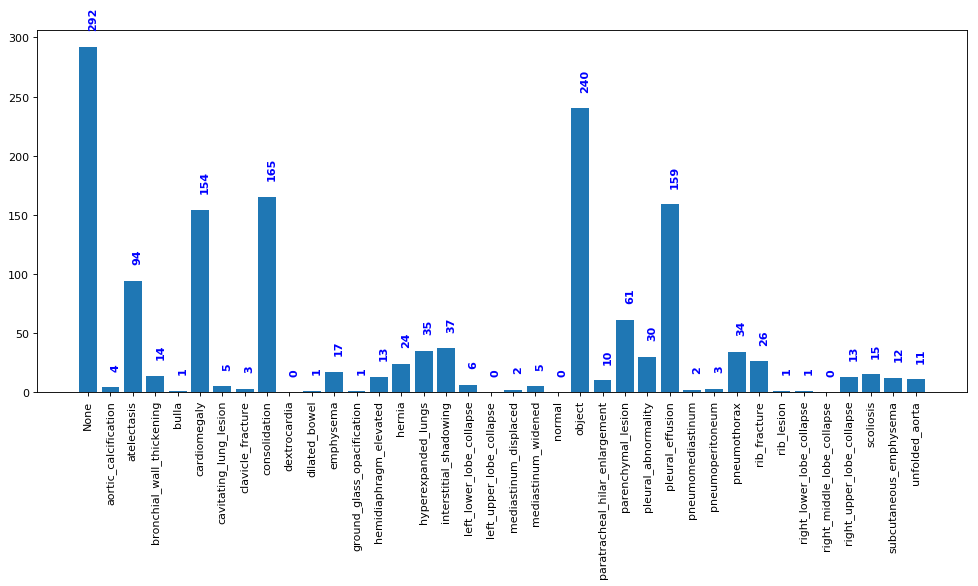

In [190]:
plotDistLabels(dLabelsInSet, tagLabels=dLabelsInDB.keys())

In [192]:
dfReportsRAND1K.head()
dfReportsRAND1K.to_csv('/home/ydc19/Projects/chestXrays/ReportsForAnnotateX/selReports_RAND1K_ABNORMAL_1.csv', index=False, columns=dfReportsRAND1K.columns, sep='$', encoding='utf-8')